In [ ]:
!pip3 install gensim==3.8.3

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from gensim.models import Word2Vec 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings;
warnings.filterwarnings('ignore')

df = pd.read_excel('/content/drive/MyDrive/HPE/Sent/Results New.xlsx')

In [ ]:
df.shape
df.isnull().sum()
df.dropna(inplace=True)

**New Commit**

In [ ]:
print("Enter new What and Why and filename\n")
Whatnew=input()
Whynew=input()
fname=input()

Enter new What and Why and filename

This PR aims to update MiMa based on Apache Spark 3.1.1 (the first release on 3.1 line) for Apache Spark 3.2.0 release.
Old MiMa rules hides the breaking changes in Apache Spark 3.2.0. We need to audit and document it correctly in MiMa exclusion file. This issue is discussed here originally.
dev/deps/spark-deps-hadoop-3.2-hive-2.3


In [ ]:
f_name=[]
f_name=fname.split(",")
f_name

['dev/deps/spark-deps-hadoop-3.2-hive-2.3']

In [ ]:
#Clean Input
import re
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
new_stopwords= ["let","make","xa","till","pr","eg","spark"]
stop_words.extend(new_stopwords)

sentence1 = str(Whatnew.lower())
sentence2 = str(Whynew.lower())

sentence1 = re.sub(r'(```)(.*?)(```)','',sentence1,flags=re.DOTALL) #remove codes
sentence1 = re.sub(r'http\S+', ' ', sentence1)                      #removing urls
sentence1 = ''.join([i for i in sentence1 if not i.isdigit()])      #removing digits
sentence1 = re.sub(r'[^\w\s]',' ',sentence1)                        #removing special characters
words1=nltk.word_tokenize(sentence1)                                #tokenizing
words_What=[w for w in words1 if not w in stop_words]               #removing stop_words
What1= ' '.join([str(elem) for elem in words_What])                 #list_to_string

sentence2 = re.sub(r'(```)(.*?)(```)','',sentence2,flags=re.DOTALL) #remove codes
sentence2 = re.sub(r'http\S+', ' ', sentence2)                      #remove urls
sentence2 = ''.join([i for i in sentence2 if not i.isdigit()])      #removing digits
sentence2 = re.sub(r'[^\w\s]',' ',sentence2)                        #removing special characters
words2=nltk.word_tokenize(sentence2)                                #tokenizing
words_Why=[w for w in words2 if not w in stop_words]                #removing stop_words
Why1= ' '.join([str(elem) for elem in words_Why])                   #list_to_string

print("\n\nWhat and Why columns after cleaning: \n\n"+What1+"\n"+Why1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


What and Why columns after cleaning: 

aims update mima based apache first release line apache release
old mima rules hides breaking changes apache need audit document correctly mima exclusion file issue discussed originally


In [ ]:
for i in range(len(f_name)):
  df2=['commitid','Subject','Name','mailid','name2','mail2','A','M','D',f_name[i],What1,Why1]
  series=pd.Series(df2,index=df.columns)
  df=df.append(series,ignore_index=True)

In [ ]:
df

,CommitID,Subject,Authname,Authmail,Commname,Commmail,Modf,Added,Dltd,Fname,What,Why
0,11ea255283509a9f016f378df4865235a25b1851,[SPARK-35111][SQL] Support Cast string to year...,Angerszhuuuu,angers.zhu@gmail.com,Max Gekk,max.gekk@gmail.com,TRUE,False,False,sql/catalyst/src/main/scala/org/apache/spark/s...,Support Cast string to year-month intervalSupp...,Support Cast string to year-month interval
1,11ea255283509a9f016f378df4865235a25b1851,[SPARK-35111][SQL] Support Cast string to year...,Angerszhuuuu,angers.zhu@gmail.com,Max Gekk,max.gekk@gmail.com,TRUE,False,False,sql/catalyst/src/main/scala/org/apache/spark/s...,Support Cast string to year-month intervalSupp...,Support Cast string to year-month interval
2,11ea255283509a9f016f378df4865235a25b1851,[SPARK-35111][SQL] Support Cast string to year...,Angerszhuuuu,angers.zhu@gmail.com,Max Gekk,max.gekk@gmail.com,TRUE,False,False,sql/catalyst/src/test/scala/org/apache/spark/s...,Support Cast string to year-month intervalSupp...,Support Cast string to year-month interval
3,2d2f467831d17df38fc6522da5066a8d848caaf5,[SPARK-35169][SQL] Fix wrong result of min ANS...,Angerszhuuuu,angers.zhu@gmail.com,Wenchen Fan,wenchen@databricks.com,TRUE,False,False,sql/catalyst/src/main/scala/org/apache/spark/s...,Before this patchWrong result of min ANSI inte...,Fix bug
4,2d2f467831d17df38fc6522da5066a8d848caaf5,[SPARK-35169][SQL] Fix wrong result of min ANS...,Angerszhuuuu,angers.zhu@gmail.com,Wenchen Fan,wenchen@databricks.com,TRUE,False,False,sql/core/src/test/resources/sql-tests/inputs/i...,Before this patchWrong result of min ANSI inte...,Fix bug
...,...,...,...,...,...,...,...,...,...,...,...,...
10734,b786f31a42180523b0baa8113e26b2ddee445498,[SPARK-32643][CORE][K8S] Consolidate state dec...,Devesh Agrawal,devesh.agrawal@gmail.com,Holden Karau,hkarau@apple.com,TRUE,False,False,core/src/test/scala/org/apache/spark/scheduler...,The decommissioning state is a bit fragment ac...,This is just a code cleanup. These two feature...
10735,d3304268d3046116d39ec3d54a8e319dce188f36,[MINOR][PYTHON] Fix typo in a docsting of RDD....,unirt,lunirtc@gmail.com,Dongjoon Hyun,dongjoon@apache.org,TRUE,False,False,python/pyspark/sql/session.py,Fixes typo in docsting of `toDF`,The third argument of `toDF` is actually `samp...
10736,a3179a78b6619f27726bd7fb2d81d2fce5f00fd1,[SPARK-32664][CORE] Switch the log level from ...,Daniel Moore,moore@knights.ucf.edu,HyukjinKwon,gurwls223@apache.org,TRUE,False,False,core/src/main/scala/org/apache/spark/storage/B...,Changing an info log to a debug log based on S...,It is outlined in SPARK-32664
10737,commitid,Subject,Name,mailid,name2,mail2,A,M,D,,aims update mima based apache first release li...,old mima rules hides breaking changes apache n...


In [ ]:
df['Why']= df['Why'].astype(str)
Why=df["Why"]

commits = df["CommitID"].unique().tolist()
print(len(commits))

commits_train = commits
train_df = df[df['CommitID'].isin(commits_train)]

1537


In [ ]:
Why_train = []
for i in tqdm(commits_train):
    temp1 = train_df[train_df["CommitID"] == i]["Why"].tolist()
    Why_train.append(temp1)

100%|██████████| 1537/1537 [00:01<00:00, 791.31it/s]


**Word2Vec**

In [ ]:
#train word2vec model
model1 = Word2Vec(window = 10,  hs = 0,sg=1,size=300,
                 negative = 10,min_count=1,
                 alpha=0.025, min_alpha=0.0007,
                 seed = 14)


model1.build_vocab(Why_train, progress_per=200)

model1.train(Why_train, total_examples = model1.corpus_count, 
            epochs=10, report_delay=1)

model1.init_sims(replace=True)
#print(model1)
# extract all vectors
X = model1[model1.wv.vocab]
X.shape
DICT = model1.wv.vocab
def getList(dict):
    return dict.keys()
 
LI=getList(DICT)
df_WHY=[]
df_WHY = pd.DataFrame({'NewWhy':LI})
#print (df_WHY)

In [ ]:
!pip install hdbscan
!pip install umap-learn

     |████████████████████████████████| 6.4MB 3.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311682 sha256=7a34f291527f6ef1f96f163ea7eadd365296c00adc16a8a84972feb60de6fb25
  Stored in directory: /root/.cache/pip/wheels/42/63/fb/314ad6c3b270887a3ecb588b8e5aac50b0fad38ff89bb6dff2
Successfully built hdbscan
     |████████████████████████████████| 81kB 2.7MB/s 
     |████████████████████████████████| 1.1MB 4.9MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-cp37-none-any.whl size=76569 sha256=2747a3cee6c1c844f5689e16df4a14b2497160997d8c3db65600cfebdf692849
  Stored in directory: /root/.cache/pip/wheels/ad/df/d5/a3691296ff779f25cd1cf415a3af954b987fb53111e3392cf4
  Created wheel for pynndescent: filename=pynndescent-0.5.4-cp37-none-any.whl size=52374 sha256=0a6b72081191111eab694f1ad0fe973c7933b2e9fc3c95bc

**Principal Component Analysis**


In [ ]:
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

from sklearn.decomposition import PCA
pca = PCA(n_components=2,random_state=42)
principalComponents = pca.fit_transform(X)

**UMAP**

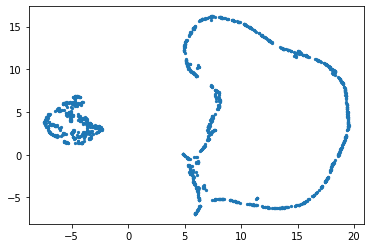

In [ ]:
import umap.umap_ as umap
cluster_embedding = umap.UMAP(random_state=42).fit_transform(principalComponents)
plt.scatter(cluster_embedding[:, 0],cluster_embedding[:, 1],s=5, cmap='Spectral')

**HDBSCAN**

In [ ]:
import hdbscan
hdbscan_labels=hdbscan.HDBSCAN().fit_predict(cluster_embedding)
np.unique(hdbscan_labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
       84, 85, 86, 87, 88, 89, 90, 91, 92, 93])

In [ ]:
cluster_map = pd.DataFrame()
newdf=pd.DataFrame()
cluster_map['cluster'] = hdbscan_labels
cluster_num = hdbscan_labels[model1.wv.vocab[Why1].index]

newdf = cluster_map[cluster_map.cluster == cluster_num]

newlist=[]
for row in newdf.index:
    newlist.append(row)

#len(newlist) #newlist has index and the cluster they belong to

rowData=[] 
rowData= df_WHY.loc[ newlist , : ] #getting 'Why's corresponding to the index

Newrow=rowData.merge(df,how='left',left_on='NewWhy',right_on='Why')

In [ ]:
frequency_df=[]
frequency_df = Newrow.groupby('Fname').count()
frequency_df=frequency_df.sort_values('CommitID',ascending=False)
frequency_df['Modf']         #getting frequency of fname in this particular cluster

Fname
pom.xml                                                                                                                       10
sql/catalyst/src/main/scala/org/apache/spark/sql/internal/SQLConf.scala                                                       10
dev/deps/spark-deps-hadoop-2.7-hive-2.3                                                                                        7
dev/deps/spark-deps-hadoop-3.2-hive-2.3                                                                                        7
sql/catalyst/src/main/scala/org/apache/spark/sql/catalyst/analysis/Analyzer.scala                                              6
                                                                                                                              ..
resource-managers/kubernetes/core/src/main/scala/org/apache/spark/scheduler/cluster/k8s/KubernetesClusterManager.scala         1
resource-managers/kubernetes/core/src/main/scala/org/apache/spark/scheduler/cluster/k8s/Exe

In [ ]:
#f_name

**RECOMMEND FILES**

In [ ]:
Newrow = Newrow.dropna(how = 'all')
for i in range(len(f_name)):
  Newrow.drop(Newrow[Newrow['Fname'] == f_name[i]].index, inplace = True)

In [ ]:
frequency_df1=[]
frequency_df1 = Newrow.groupby('Fname').count()
frequency_df1=frequency_df1.sort_values('CommitID',ascending=False).head()
frequency_df1['Modf']         #getting frequency of fname in this particular cluster

Fname
sql/catalyst/src/main/scala/org/apache/spark/sql/internal/SQLConf.scala              10
pom.xml                                                                              10
dev/deps/spark-deps-hadoop-2.7-hive-2.3                                               7
sql/catalyst/src/main/scala/org/apache/spark/sql/catalyst/parser/AstBuilder.scala     6
sql/catalyst/src/main/scala/org/apache/spark/sql/catalyst/analysis/Analyzer.scala     6
Name: Modf, dtype: int64